# Simulation Red Bull Wololo Legacy Age of Empires 2 DE

In [4]:
import pandas as pd
import numpy as np
from itertools import combinations
from numpy import random
import matplotlib.pyplot as plt


## Data for the algorithm

In [2]:
# initializing list
players_list = ['capoch',
             'daut',
             'dogao',
             'jordan_aoe',
             'kingstone',
             'mbl',
             'theviper',
             'villese',
             'accm',
             'daniel',
             'hera',
             'liereyy',
             'sitaux',
             'tatoh',
             'valas',
             'yo'
            ]

# All possible pairs in List
# Using combinations()
res = list(combinations(players_list, 2))
df_players = pd.DataFrame(res, columns=['player1','player2'])
df_players['proba'] = 0.5
df_players.to_csv('df_players.csv',index=False)

In [3]:
# def proba table
df_proba = pd.read_csv('df_proba.csv')


## Functions for the tournament logic

In [4]:
## function best of n matches, we simulate with binomial distribution
def bon(p1, p2, n_match):
    
    # first we compute the probability of p1 win

    if len(df_proba[(df_proba.player1 == p1)&(df_proba.player2 == p2)]) > 0:
        proba = float(df_proba[(df_proba.player1 == p1)&(df_proba.player2 == p2)]['proba'])
    else:
        proba = 1 - float(df_proba[(df_proba.player1 == p2)&(df_proba.player2 == p1)]['proba'])

    # we simulate the matches
    win_p1 = random.binomial(n=n_match, p=proba, size=1)[0]
    if win_p1 >= int(n_match/2)+1:
        ganador = p1
        perdedor = p2
    else:
        ganador = p2
        perdedor = p1
    return ganador,perdedor


## function for grooup stage the order of the variables is important
def group_stage(p1, p2, p3, p4, p5, p6, p7, p8):

    # Opening matches, we get 4 winners and 4 loosers
    w1, l1 = bon(p1, p2, 3)
    w2, l2 = bon(p3, p4, 3)
    w3, l3 = bon(p5, p6, 3)
    w4, l4 = bon(p7, p8, 3)

    # elimination matches, we get 2 deciders and 2 eliminations

    d1, e1 = bon(l1, l4, 3)
    d2, e2 = bon(l2, l3, 3)

    # winner matches, we get 2 classifiers and 2 deciders

    c1, d3 = bon(w1, w4, 3)
    c2, d4 = bon(w2, w3, 3)

    # decider matches, we get 2 classifiers and 2 eliminations

    c3, e3 = bon(d1, d3, 3)
    c4, e4 = bon(d2, d4, 3)

    return c1, c2, c3, c4, e1, e2, e3, e4


## function for quarters and semifinals
def quarter_semifinals(p1, p2, p3, p4, p5, p6, p7, p8):

    # quarterfinals, we get 4 winners 4 quarterfinalists
    w1, q1 = bon(p1, p2, 5)
    w2, q2 = bon(p3, p4, 5)
    w3, q3 = bon(p5, p6, 5)
    w4, q4 = bon(p7, p8, 5)

    #semifinals, we get 2 finalist and 2 semifinalist
    f1, s1 = bon(w1, w2, 5)
    f2, s2 = bon(w3, w4, 5)

    return f1, f2, s1, s2, q1, q2, q3, q4

In [5]:
def wololo_simulation():

    # first the group stage we get 8 playoffs and 8 eliminations

    p1, p2, p3, p4, e1, e2, e3, e4 = group_stage(
        'theviper',
        'kingstone',
        'daut',
        'dogao',
        'villese',
        'capoch',
        'jordan_aoe',
        'mbl',
    )

    p5, p6, p7, p8, e5, e6, e7, e8 = group_stage(
        'liereyy',
        'daniel',
        'yo',
        'valas',
        'hera',
        'sitaux',
        'tatoh',
        'accm',
    )

    f1, f2, s1, s2, q1, q2, q3, q4 = quarter_semifinals(p1, p2, p3, p4, p5, p6, p7, p8)

    # winner and second place

    w1, sp1 = bon(f1, f2, 7)

    df_resultados01 = pd.DataFrame( [e1,e2,e3,e4,e5,e6,e7,e8], columns=['jugadores'] )
    df_resultados01['posicion'] = 'eliminado'

    df_resultados02 = pd.DataFrame( [q1,q2,q3,q4], columns=['jugadores'] )
    df_resultados02['posicion'] = 'quarter'

    df_resultados03 = pd.DataFrame( [s1,s2], columns=['jugadores'] )
    df_resultados03['posicion'] = 'semifinal'

    df_resultados04 = pd.DataFrame( [sp1], columns=['jugadores'] )
    df_resultados04['posicion'] = 'second_place'

    df_resultados05 = pd.DataFrame( [w1], columns=['jugadores'] )
    df_resultados05['posicion'] = 'winner'

    df_resultados = pd.concat([df_resultados01,
                              df_resultados02,
                              df_resultados03,
                              df_resultados04,
                              df_resultados05
                            ])

    return df_resultados.reset_index(drop=True).sort_values(by='jugadores')

In [6]:
df_wololo = wololo_simulation()
df_wololo

,jugadores,posicion
6,accm,eliminado
8,capoch,quarter
4,daniel,eliminado
9,daut,quarter
1,dogao,eliminado
13,hera,semifinal
14,jordan_aoe,second_place
2,kingstone,eliminado
10,liereyy,quarter
12,mbl,semifinal


### Run multiple simulations

In [7]:
def multiple_simulation(n_sim):
    df_wololo = wololo_simulation()
    df_total = df_wololo
    for i in range(n_sim-1):
        df_wololo2 = wololo_simulation()
        df_total = pd.concat([df_total, df_wololo2])

    df_total['conteo'] = 1

    df_conteos = df_total.pivot_table(values='conteo', index='jugadores', columns='posicion', aggfunc=np.sum, fill_value=0)
    df_conteos = df_conteos[['eliminado', 'quarter',  'semifinal', 'second_place', 'winner']]

    return df_conteos

In [11]:
simulaciones = multiple_simulation(10000)


In [8]:
for columna in ['eliminado', 'quarter', 'semifinal', 'second_place', 'winner']:
    simulaciones['porcentaje'+columna] = (simulaciones[columna] / 100)

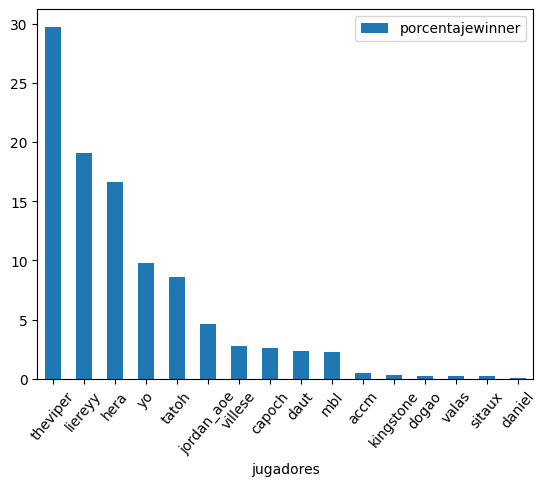

In [9]:
ax = simulaciones.plot.bar(x='jugadores', y='porcentajewinner', rot=50)

In [10]:
simulaciones.sort_values(by='winner', ascending=False)

,jugadores,eliminado,quarter,semifinal,second_place,winner,porcentajeeliminado,porcentajequarter,porcentajesemifinal,porcentajesecond_place,porcentajewinner
12,theviper,2920,1872,1154,1081,2973,29.20,18.72,11.54,10.81,29.73
8,liereyy,1081,3286,2285,1439,1909,10.81,32.86,22.85,14.39,19.09
5,hera,1750,3374,2041,1173,1662,17.50,33.74,20.41,11.73,16.62
15,yo,3956,2611,1670,785,978,39.56,26.11,16.70,7.85,9.78
11,tatoh,2220,3536,2510,876,858,22.20,35.36,25.10,8.76,8.58
6,jordan_aoe,3446,2385,2451,1256,462,34.46,23.85,24.51,12.56,4.62
14,villese,4832,2601,1404,884,279,48.32,26.01,14.04,8.84,2.79
1,capoch,4869,2847,1293,730,261,48.69,28.47,12.93,7.30,2.61
3,daut,2710,5272,1108,672,238,27.10,52.72,11.08,6.72,2.38
9,mbl,6269,1263,1561,677,230,62.69,12.63,15.61,6.77,2.30


In [7]:
# simulaciones = pd.read_csv('simulaciones.csv', index_col=0)